In [ ]:
!git clone https://github.com/eliazonta/AI-Challenge-HIT
import sys
sys.path.append("/content/AI-Challenge-HIT/python_code/notebooks")

fatal: destination path 'AI-Challenge-HIT' already exists and is not an empty directory.


In [ ]:
# load libraries
import pandas as pd
import os
import numpy as np
import datetime
from torch.utils.data import Dataset, DataLoader
from torch import save

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
class CustomDataset(Dataset):
  def __init__(self, df_train, df_test, transform = None, target_transform = None):
    self.features = torch.FloatTensor(df_train.drop(['sensor_code','in_datetime'],axis=1).values)
    ### standardize the data
    ########################## TO DO: THE STANDARDIZATION MUST INCLUDE THE TARGET!!! 
    means = self.features.mean(dim=1, keepdim=True)
    stds = torch.clamp(self.features.std(dim=1, keepdim=True),min=1)
    #self.features = (self.features - means) / stds
    self.target = torch.FloatTensor(df_test.drop(['sensor_code','in_datetime']+[f"val_{idx}" for idx in range(n_previsions)],axis=1).values)
    #self.target = (self.target - means) / stds
    
    self.sensor_code = df_train['sensor_code'].values
    self.in_datetime = df_train['in_datetime'].values
    
    self.labels = torch.FloatTensor(df_test[[f"val_{idx}" for idx in range(n_previsions)]].values)
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.sensor_code)

  def __getitem__(self, idx):
    sensor_code = self.sensor_code[idx]
    date = self.in_datetime[idx]
    features = self.features[idx]
    labels = self.labels[idx]
    target = self.target[idx]
    return {"sensor_code": sensor_code, "date":date,"features": features, "target":target,"labels":labels}


In [76]:
wk =  "/content/drive/My Drive/10. Meteotrentino/DatasetPytorch/24+1"
quantity = 'direzione_vento'
station = 'T0071'
train_path = os.path.join(
    wk,
    quantity,
    station+"_train_"+quantity+"_cos_sin_tsf.pt")
test_path = os.path.join(
    wk,
    quantity,
    station+"_test_"+quantity+"_cos_sin_tsf.pt")

In [77]:
from torch import save,load
dataset = {}
splits = ['train','test']
shuffle = {'train':True,'test':False}
dataset['train'] = load(train_path)
dataset['test'] = load(test_path)

In [52]:
dataset['test'][0]

{'sensor_code': 'T0071',
 'date': numpy.datetime64('2014-01-01T03:10:00.000000000'),
 'features': tensor([-4.3837e-01, -2.0791e-01, -1.7365e-01, -2.4192e-01,  3.4899e-02,
         -3.2557e-01, -5.0000e-01, -3.4202e-01, -6.9756e-02, -4.0674e-01,
         -3.9073e-01, -3.7461e-01, -2.4192e-01, -5.0000e-01, -6.1566e-01,
         -5.2992e-01, -3.7461e-01, -1.5643e-01, -1.0453e-01, -3.0902e-01,
         -1.8370e-16, -5.1504e-01, -5.4464e-01,  1.0000e+00, -7.1934e-01,
         -7.6604e-01,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
          2.2495e-01, -1.9081e-01,  6.1566e-01,  5.2336e-02, -4.0674e-01,
         -4.3837e-01, -8.3867e-01,  2.5882e-01, -1.7452e-02,  1.3917e-01,
         -1.5643e-01,  8.7156e-02, -1.0453e-01, -1.7365e-01, -1.7365e-01,
         -2.0791e-01, -5.8779e-01, -3.5837e-01, -5.2336e-02, -4.2262e-01,
         -8.9101e-01,  1.0000e+00, -9.2050e-01,  1.0000e+00,  1.0000e+00,
         -9.7815e-01, -1.9081e-01,  1.0000e+00,  1.0000e+00,  1.0000e+00,
          1.000

In [53]:

# dataset['train'] = CustomDataset(training_features, training_target)
# dataset['test'] = CustomDataset(test_features, test_target)
# save(dataset['train'], 'T0071_train_solar_rad_tsf.pt')
# save(dataset['test'], 'T0071_test_solar_rad_tsf.pt')


# b_size = {'train':len(dataset['train']),
b_size = {'train':64,
          'test':len(dataset['test'])}

dataloader = {x: torch.utils.data.DataLoader(dataset=dataset[x],
                                            batch_size=b_size[x],
                                            shuffle=shuffle[x],
                                            collate_fn=lambda x: x,
                                            drop_last=True)
                                            #num_workers=int(opt.workers),
                                            #worker_init_fn=(None if opt.manualseed == -1
                                            #else lambda x: np.random.seed(opt.manualseed)))
            for x in splits}


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
100%|██████████| 353/353 [00:03<00:00, 112.10it/s]


Training Loss: 0.3672
Test Loss: 0.3514


100%|██████████| 353/353 [00:03<00:00, 111.05it/s]


Training Loss: 0.3322
Test Loss: 0.3379


100%|██████████| 353/353 [00:03<00:00, 113.01it/s]


Training Loss: 0.3243
Test Loss: 0.3207


100%|██████████| 353/353 [00:03<00:00, 112.59it/s]


Training Loss: 0.3154
Test Loss: 0.3203


100%|██████████| 353/353 [00:03<00:00, 110.44it/s]


Training Loss: 0.3112
Test Loss: 0.3164


100%|██████████| 353/353 [00:03<00:00, 110.01it/s]


Training Loss: 0.3077
Test Loss: 0.3097


100%|██████████| 353/353 [00:03<00:00, 111.43it/s]


Training Loss: 0.3072
Test Loss: 0.3045


100%|██████████| 353/353 [00:03<00:00, 111.10it/s]


Training Loss: 0.3101
Test Loss: 0.3027


100%|██████████| 353/353 [00:03<00:00, 111.35it/s]


Training Loss: 0.3061
Test Loss: 0.3127


100%|██████████| 353/353 [00:03<00:00, 112.69it/s]


Training Loss: 0.3030
Test Loss: 0.3039


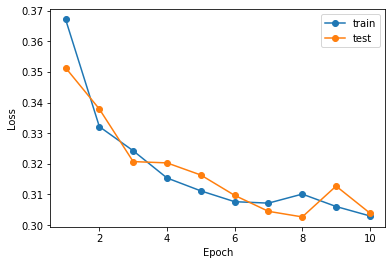

<Figure size 432x288 with 0 Axes>

In [78]:
from collections.abc import Sequence
from importlib import reload  # Python 3.4+
import torch
import sys
from torch import nn
# !git clone https://github.com/eliazonta/AI-Challenge-HIT
sys.path.append("/content/AI-Challenge-HIT/python_code/notebooks/AnomalyDetection")
import LSTMs
LSTMs = reload(LSTMs)
from LSTMs import SingleLSTMCell,LSTM

device = torch.device("cuda")
sequence_length = dataset['train'][0]['features'].size(0)
pred_length = dataset['train'][0]['target'].size(0)
# Instantiate the model with hyperparameters
model = LSTM(input_size=1, output_size=1, hidden_dim=32, device = device)
# We'll also set the model to the device that we defined earlier (default is CPU)
# Daniele: Not sure if this is useless now, should check
model = model.to(device)
#model.load_state_dict(torch.load('T0065_rad_sol_model.pt', map_location=torch.device('cpu')))

# Define hyperparameters
lr = 5e-5

# Define Loss, Optimizer
criterion = nn.MSELoss()#CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
train_loss = []
test_loss = []

from tqdm import tqdm
n_epochs = 10
for epoch in range(1, n_epochs + 1):
    model.train()
    loss_train_batch = []
    for data in tqdm(dataloader['train'], leave=True, total=len(dataloader['train'])):
      # preparing the input
      batch_input_features = torch.stack([v["features"] for v in data]).to(device)
      target_features = torch.stack([v["target"] for v in data]).to(device)
      # feed the model
      output = model(batch_input_features,pred_length)
      output = output.to(device)[:,-pred_length:]
      loss_train = criterion(output, target_features)
      loss_train.backward() # Does backpropagation and calculates gradients
      optimizer.step() # Updates the weights accordingly
      loss_train_batch.append(loss_train.item())
    
    mean_train_loss = np.mean(loss_train_batch)
    model.eval()
    # preparing the input of test dataset
    data_test = next(iter(dataloader['test']))
    test_input_features = torch.stack([v["features"] for v in data_test]).to(device)
    test_target_features = torch.stack([v["target"] for v in data_test]).to(device)
    output_test = model(test_input_features,pred_length)[:,-pred_length:]
    loss_test = criterion(output_test, test_target_features)
    train_loss.append(mean_train_loss)
    test_loss.append(loss_test.item())
    print("Training Loss: {:.4f}".format(mean_train_loss))
    print("Test Loss: {:.4f}".format(loss_test.item()))

    if mean_train_loss < 0.05:
        break

import matplotlib.pyplot as plt

plt.plot(range(1, n_epochs + 1),train_loss,'o-',label="train")
plt.plot(range(1, n_epochs + 1),test_loss,'o-',label="test")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

my_path = savewk + '/TrainedModels/graphs'
my_file = station + '_' + quantity + '_loss' + '.pdf'
plt.savefig(os.path.join(my_path, my_file))        


In [84]:
savewk = '/content/drive/My Drive/10. Meteotrentino/'
torch.save(model.state_dict(), savewk+"TrainedModels/"+station+"_"+quantity+"_model.pt")

In [79]:
def sample_splitter (restriction):
    chunk_list = []
    increment = 20000 # change me 
    if (restriction):    
        chunk_splitter = 0
        while chunk_splitter < (len(sample)-1):
            chunk_list.append([chunk_splitter,min(chunk_splitter+increment,len(sample)-1)])
            chunk_splitter = chunk_splitter+increment+1
    else:
        chunk_list.append([0,len(sample)-1])
        
    return chunk_list

In [80]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

sample = dataset["train"]
### use True below to chunk in a list of min and max indexes in case of memory overflow, otherwise set to False
samples_list = sample_splitter(False)



def extract_quantity_from_dataset(dataset,label_of_quantity,indexes=None,device='cpu'):
  # returns a pytorch array of the given quantity
  # optional: restrict the dataset to some indexes (for memory allocation reasons)
  if(indexes):
    pt_tensor = torch.stack([dataset[i][label_of_quantity] for i in range(min(indexes),max(indexes)+1)]).to(device)
  else: pt_tensor = torch.stack([v[label_of_quantity] for v in dataset]).to(device)
  return pt_tensor

for restriction in samples_list:
  sample_tensor_validation = extract_quantity_from_dataset(sample,"labels",restriction)

  sample_tensor_features = extract_quantity_from_dataset(sample,"features",restriction,device=device) 

  sample_tensor_target = extract_quantity_from_dataset(sample,"target",restriction,device=device)
##
sensor_code = [v['sensor_code'] for v in sample][0]
date = pd.to_datetime([v['date'] for v in sample]).strftime("%d/%m/%Y %H:%M") 

model.eval()
with torch.no_grad():
    reconstructed = model(sample_tensor_features,pred_length)

# Find the data with highest loss
criterion = nn.MSELoss(reduction='none')
TOP_K_loss = 10
loss = criterion(reconstructed[:,-pred_length:], sample_tensor_target).mean(dim=1)
top_loss, top_loss_indexes = torch.topk(loss, TOP_K_loss, dim=0)
# # confidence interval
# # rolling mean over n_steps
# n_steps = 3
# time_series_df = pd.DataFrame(original_signal)
# line = time_series_df.rolling(n_steps).mean()
# # 98% confidence
# line_deviation = 2.326 * time_series_df.rolling(n_steps).std()
# under_line = (line - line_deviation)[0]
# over_line = (line + line_deviation)[0]


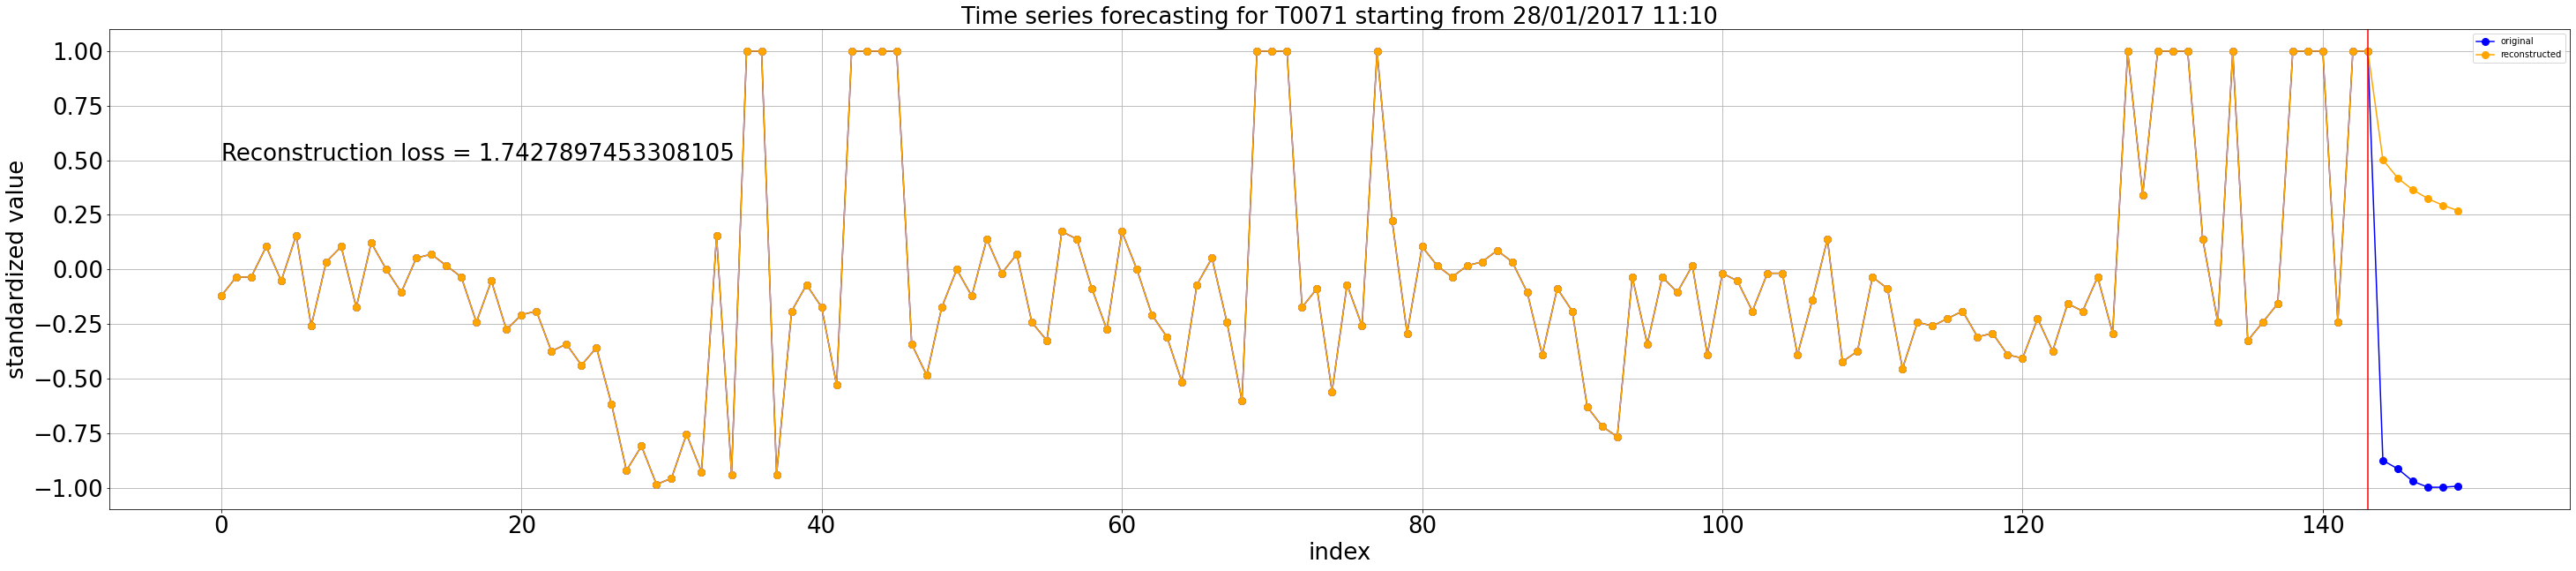

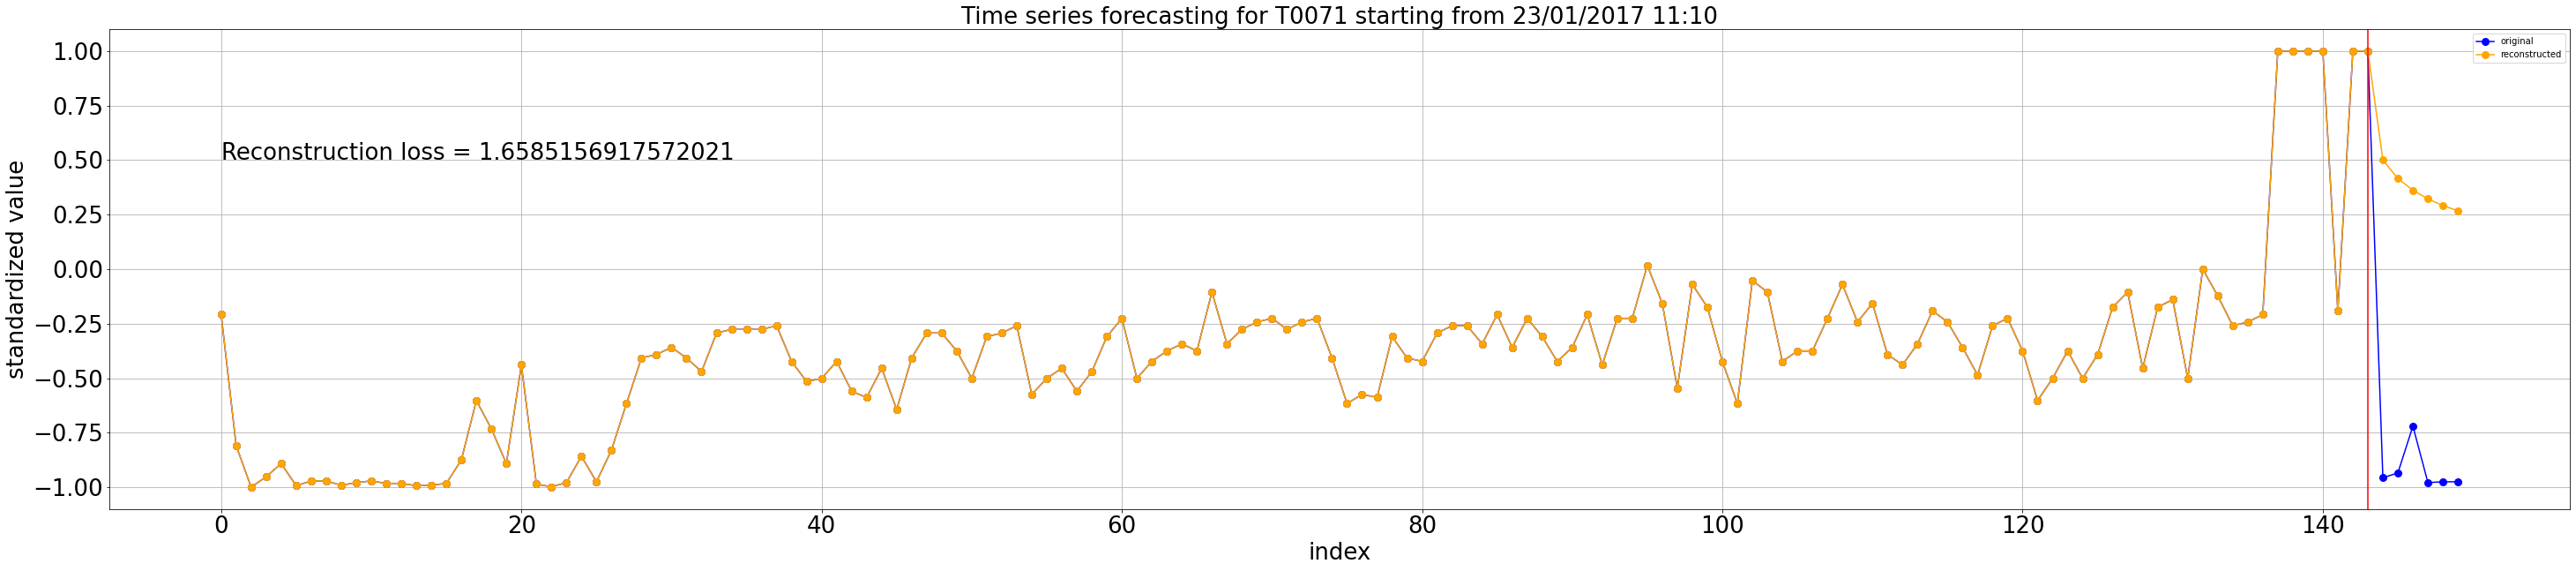

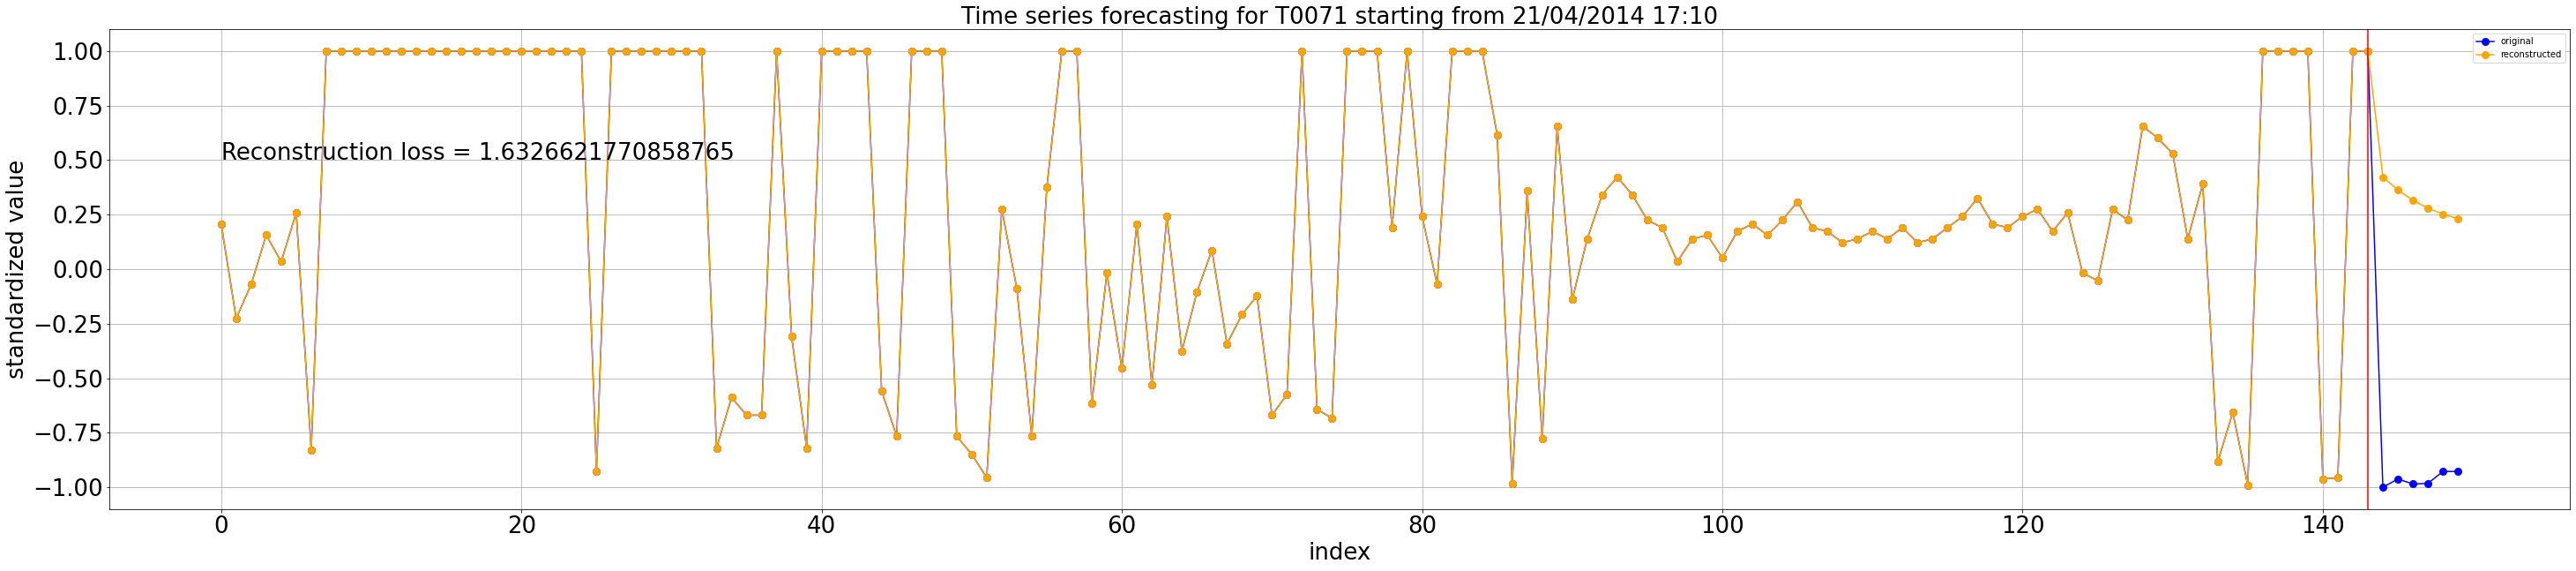

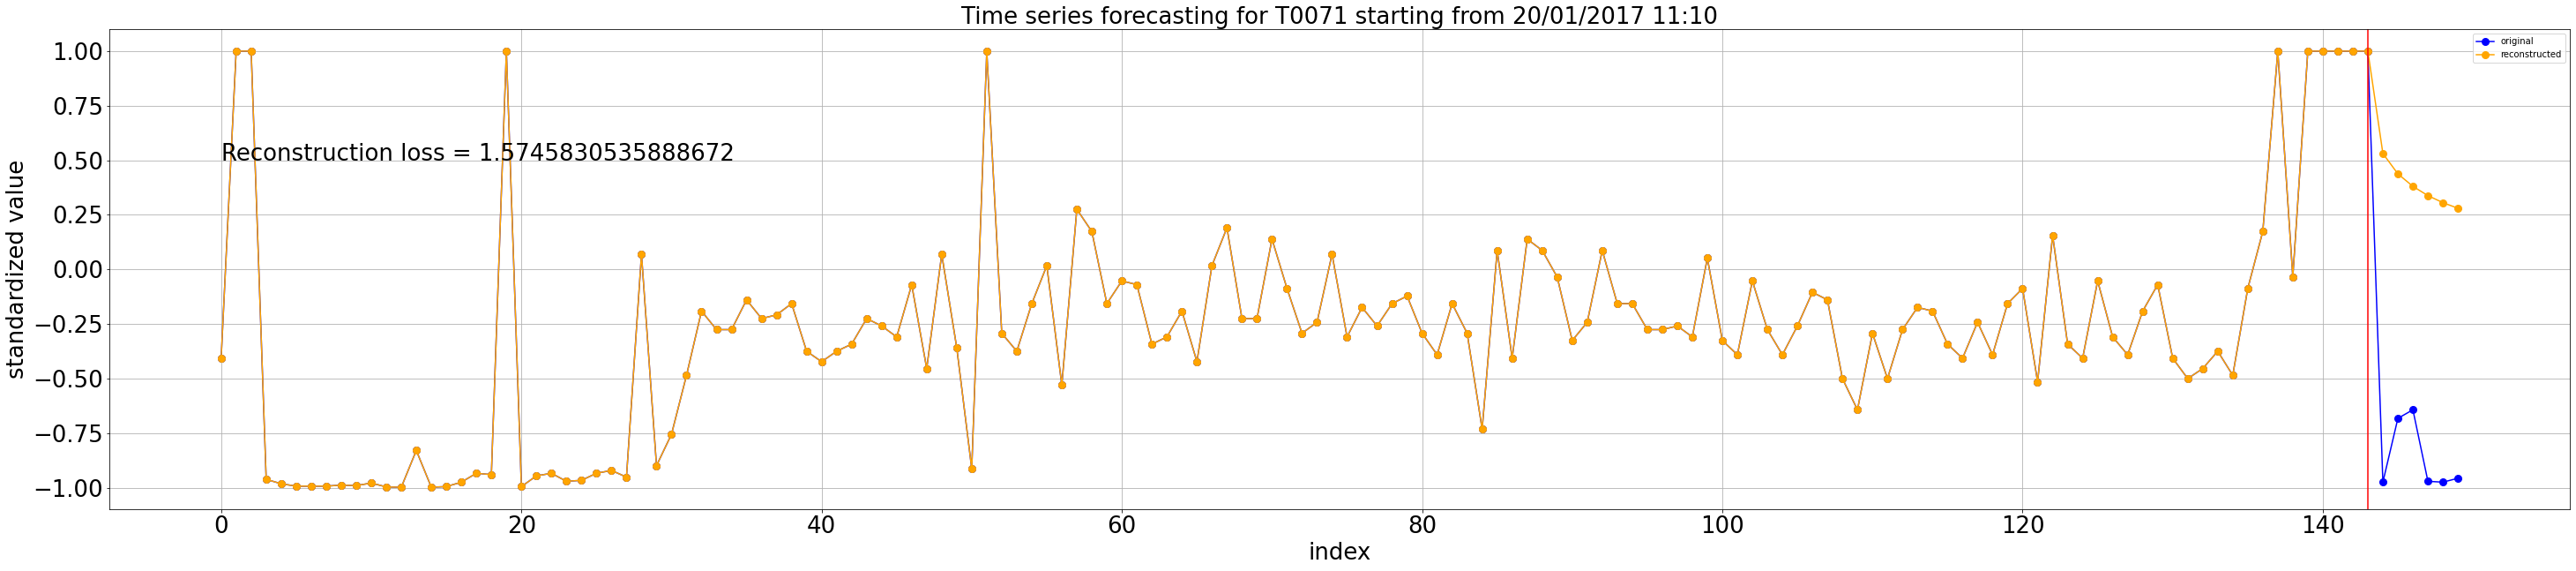

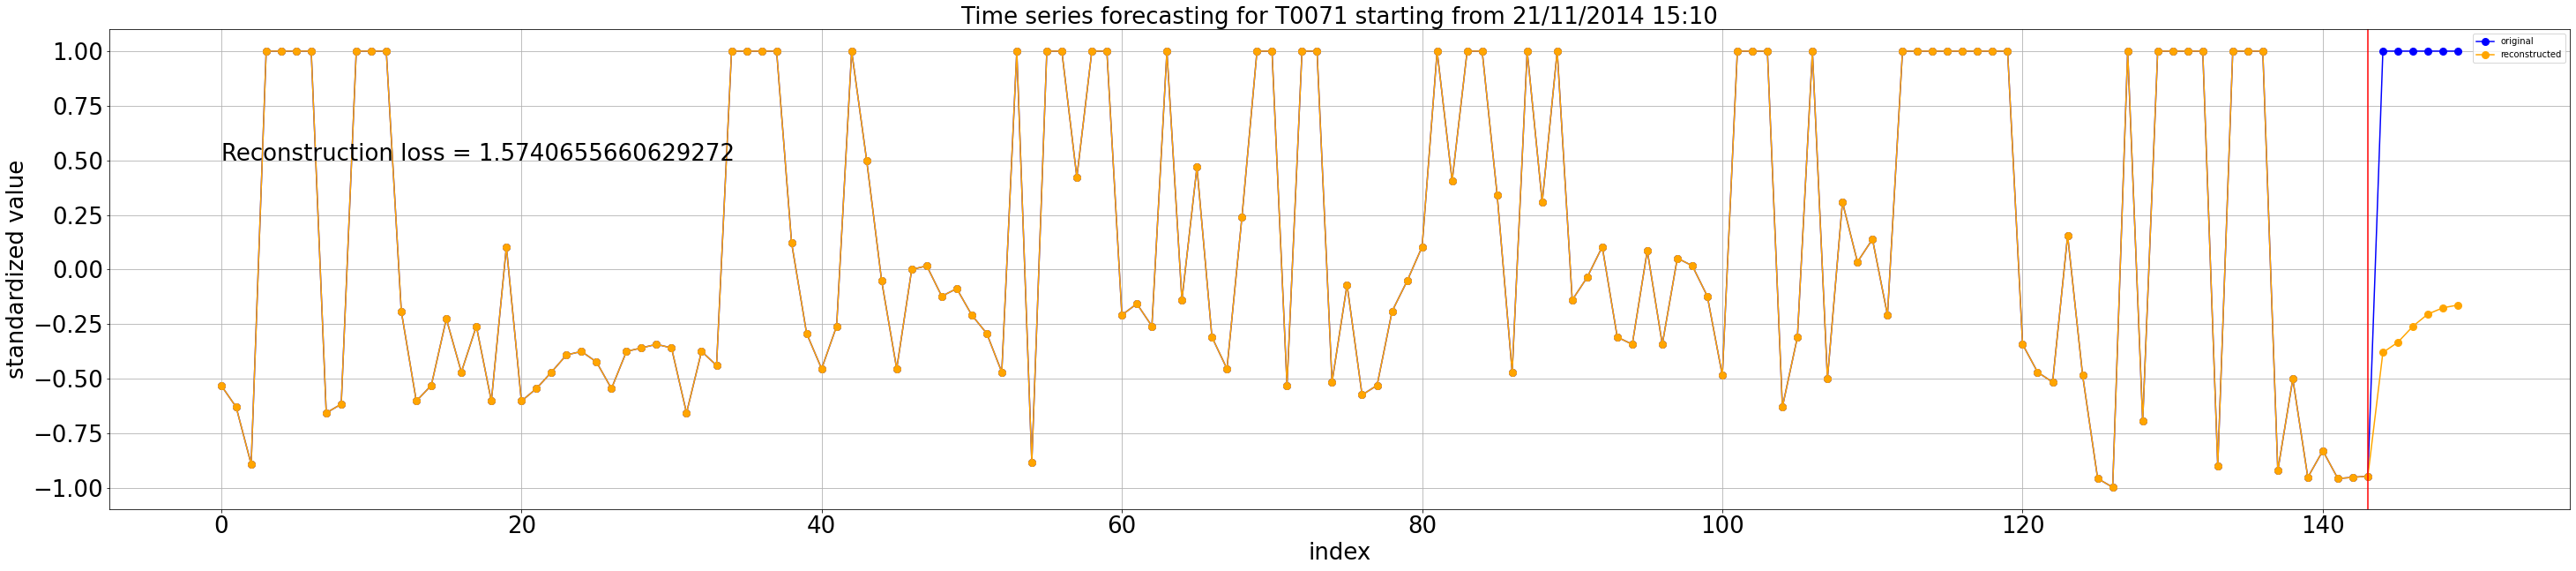

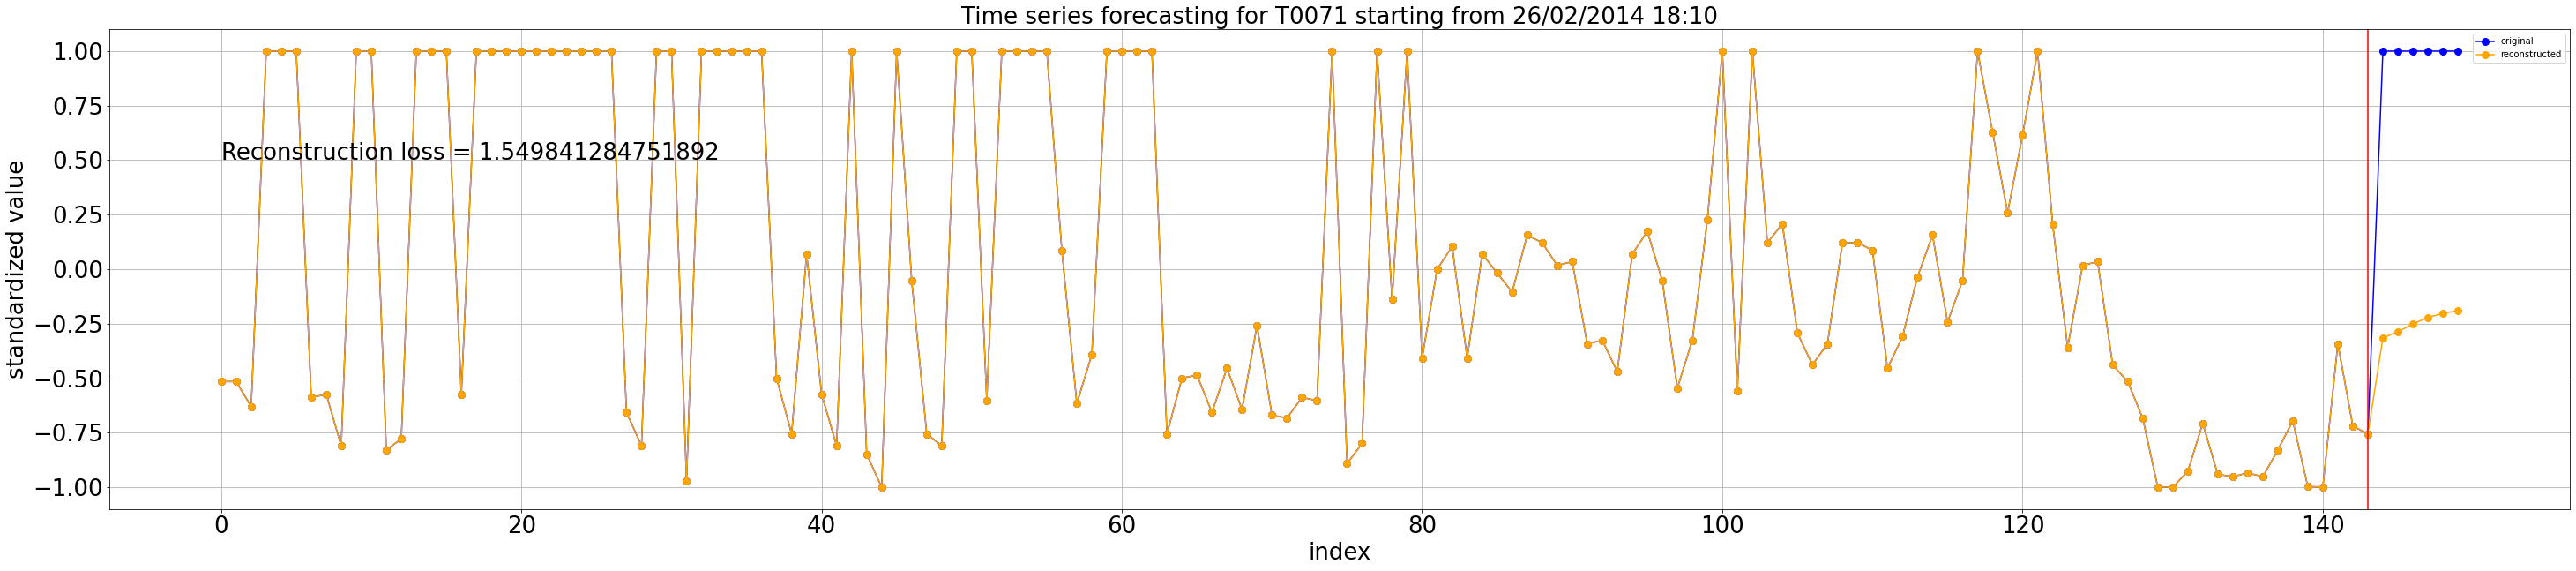

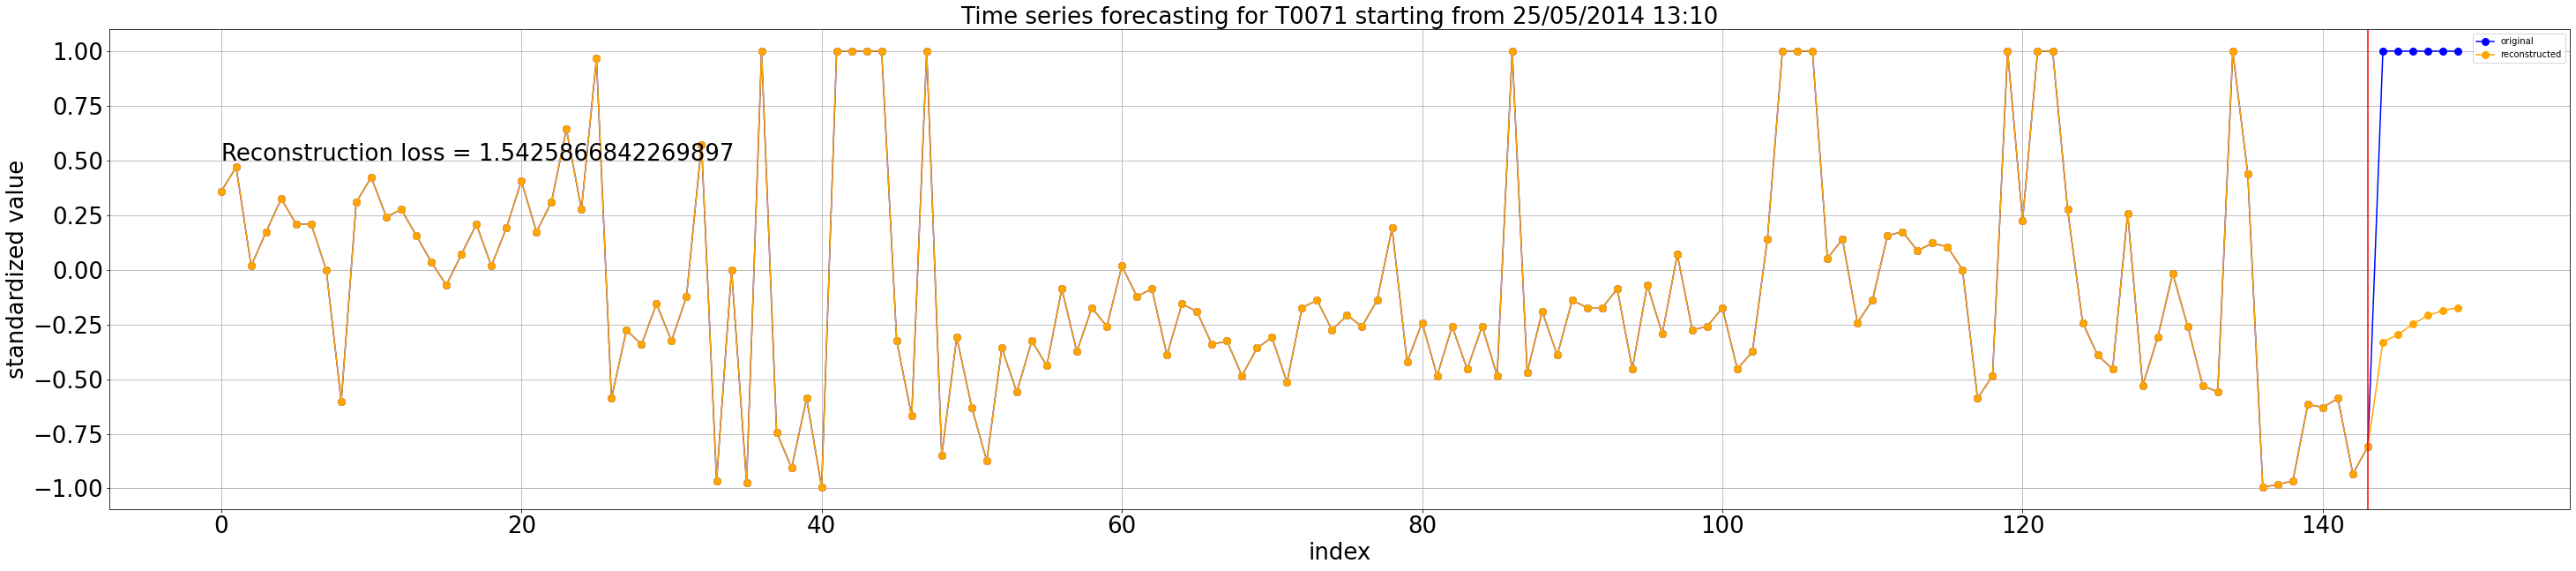

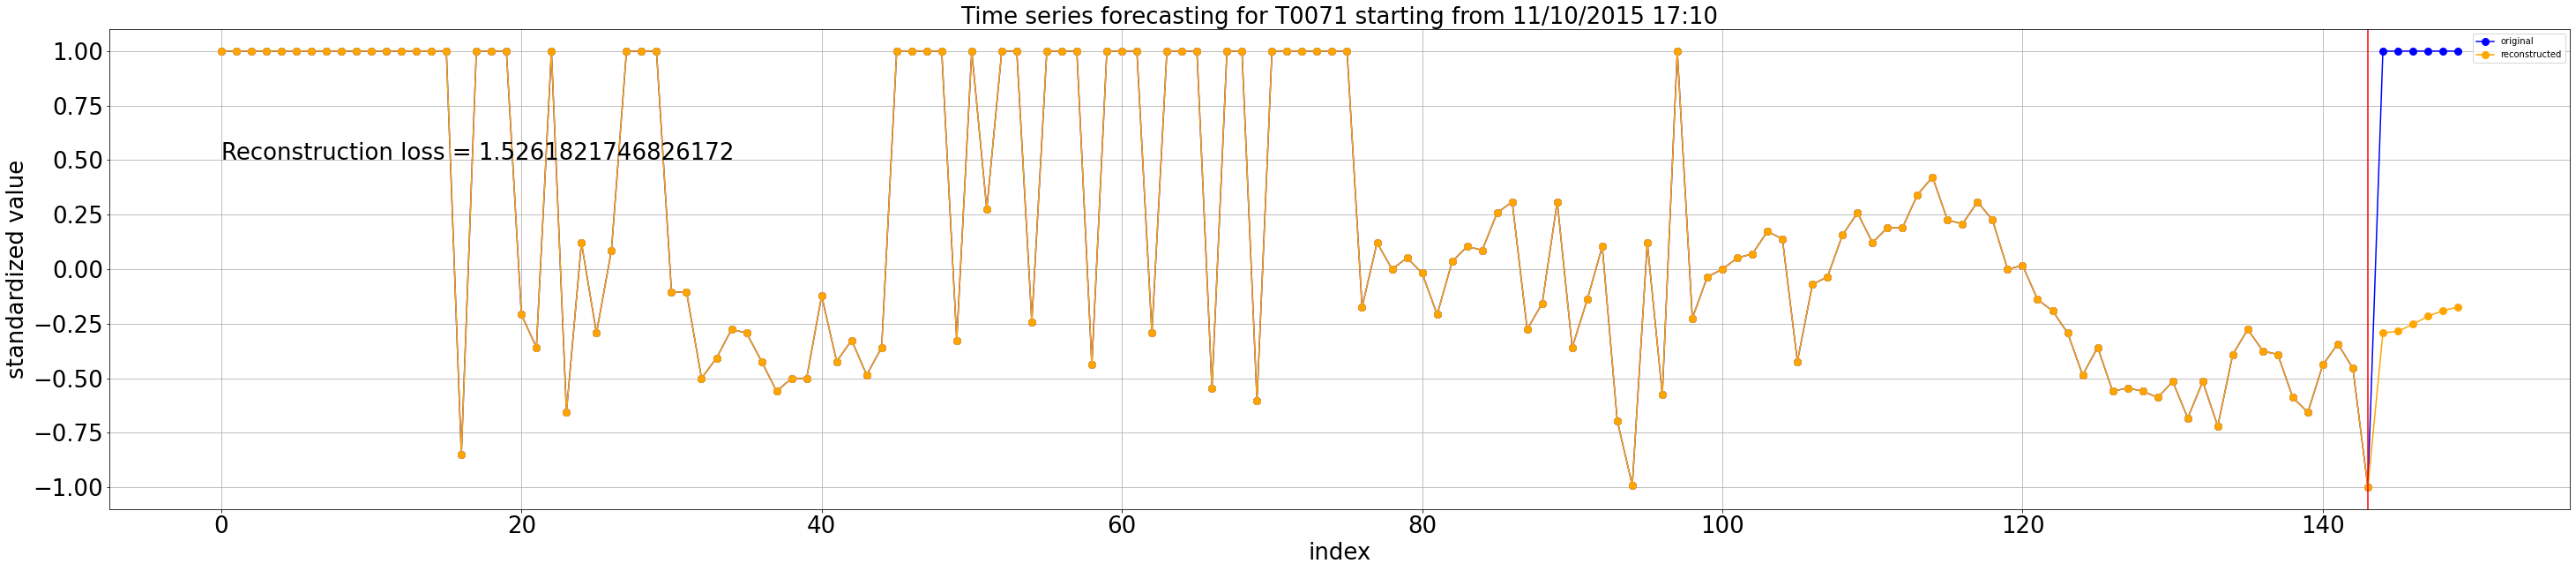

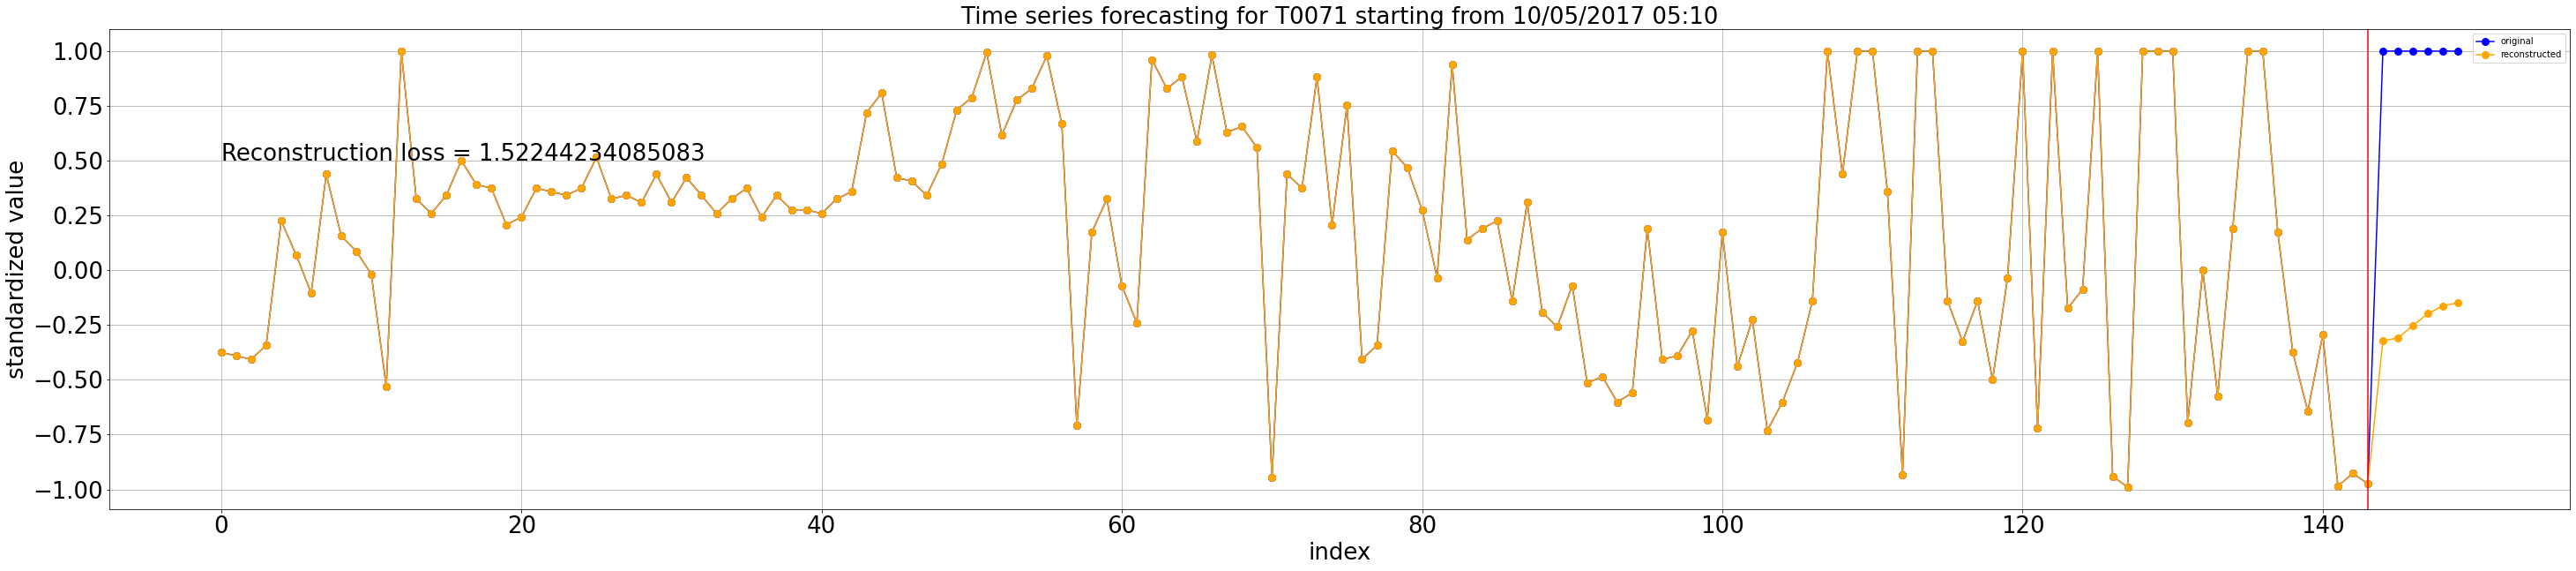

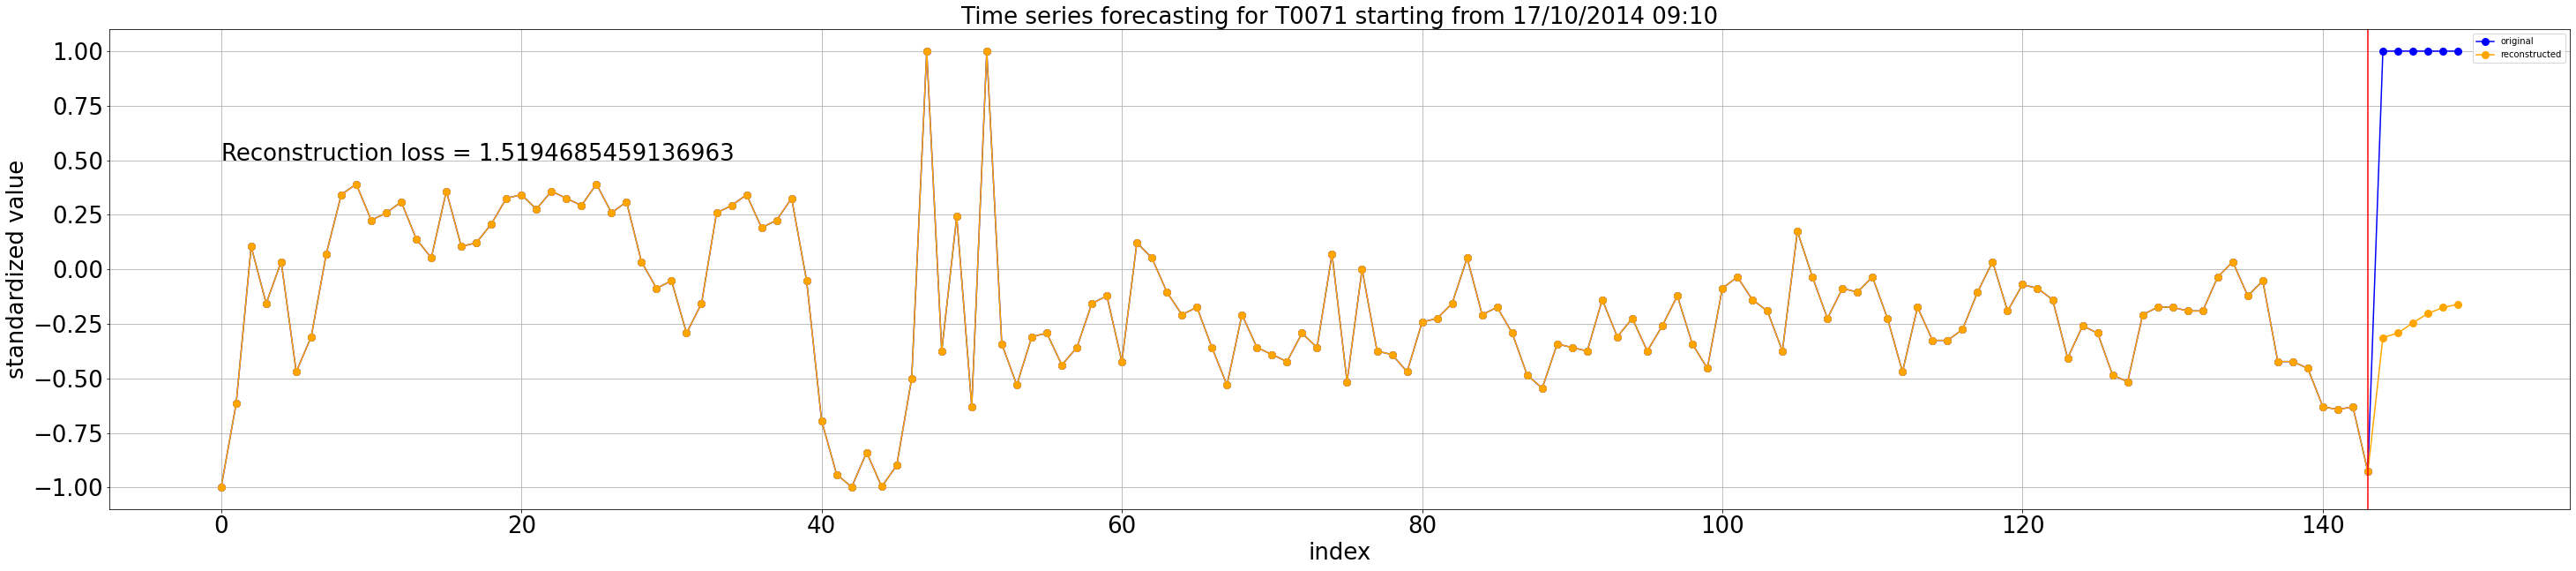

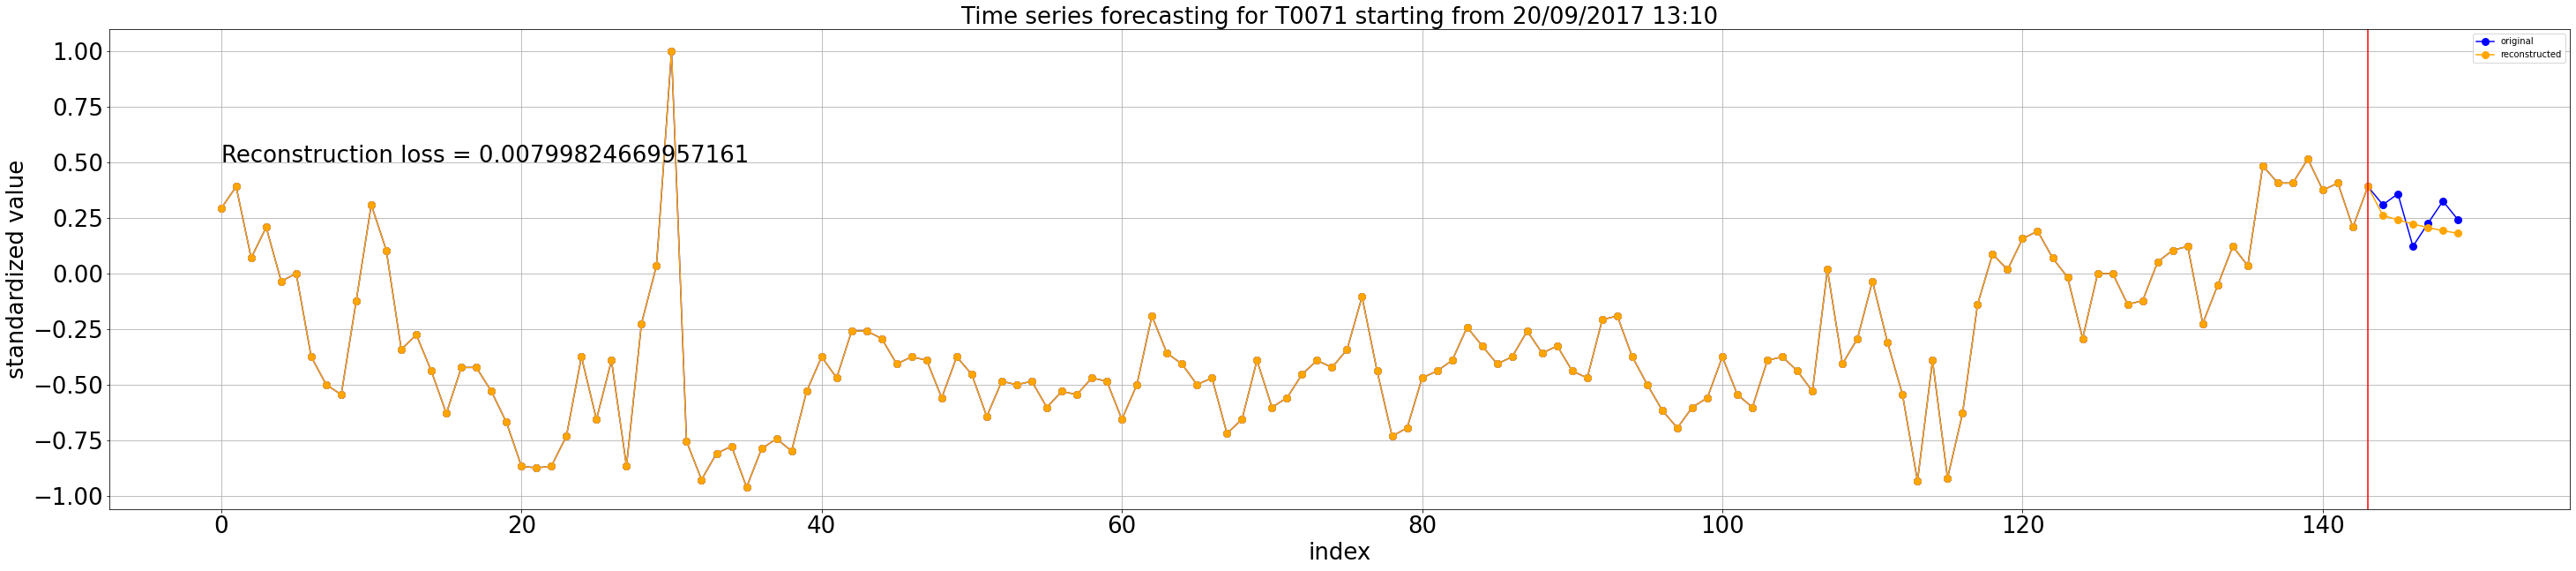

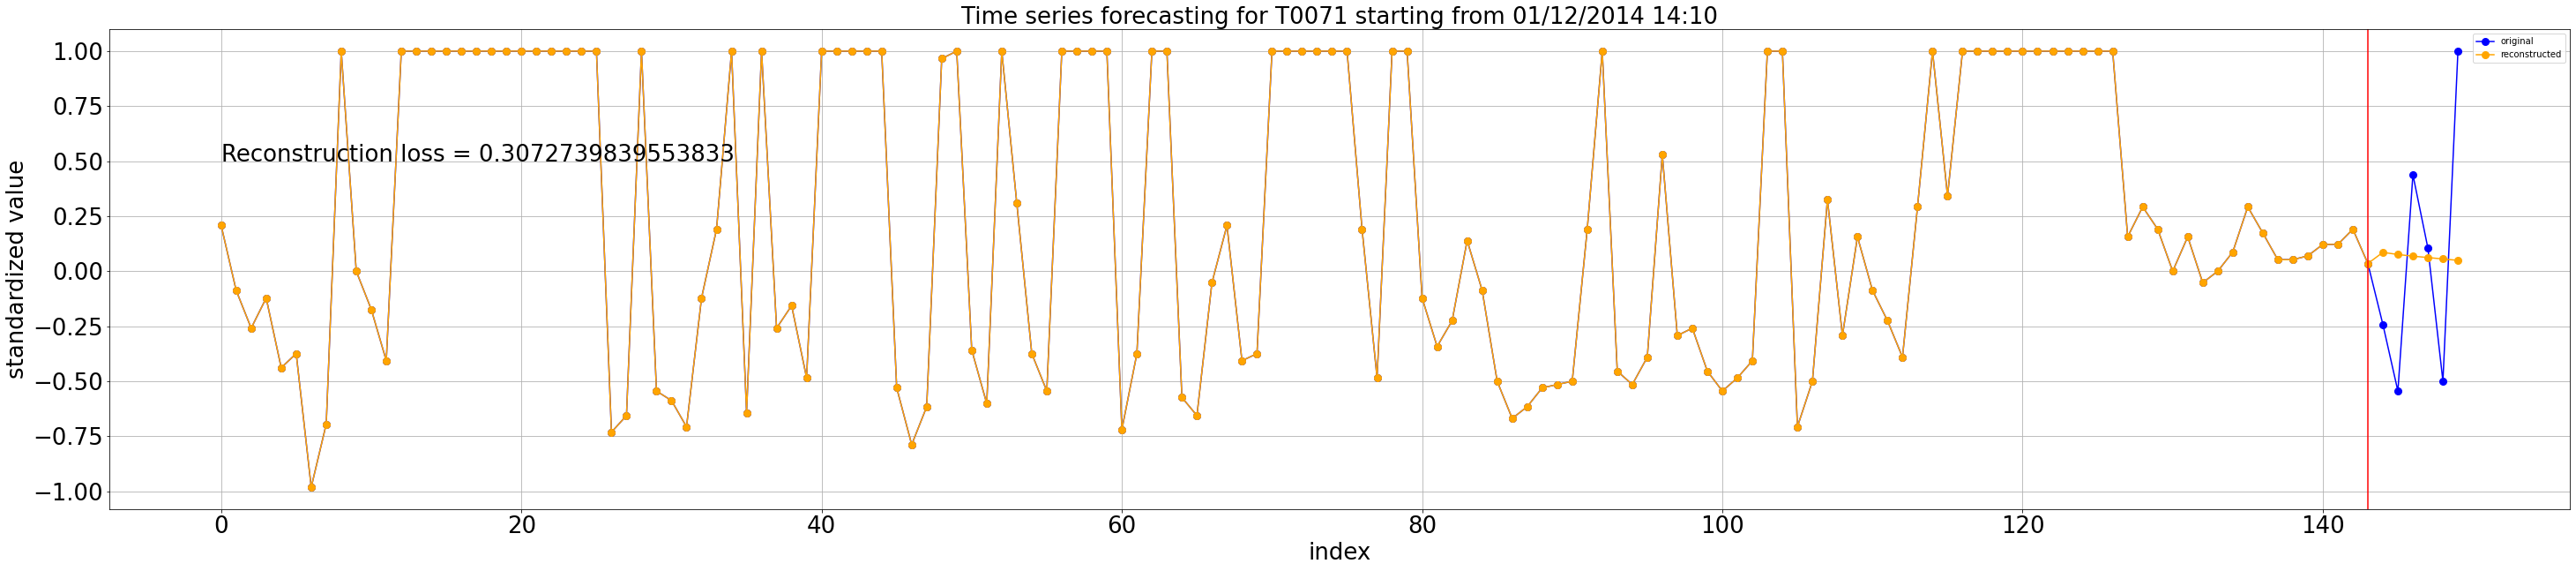

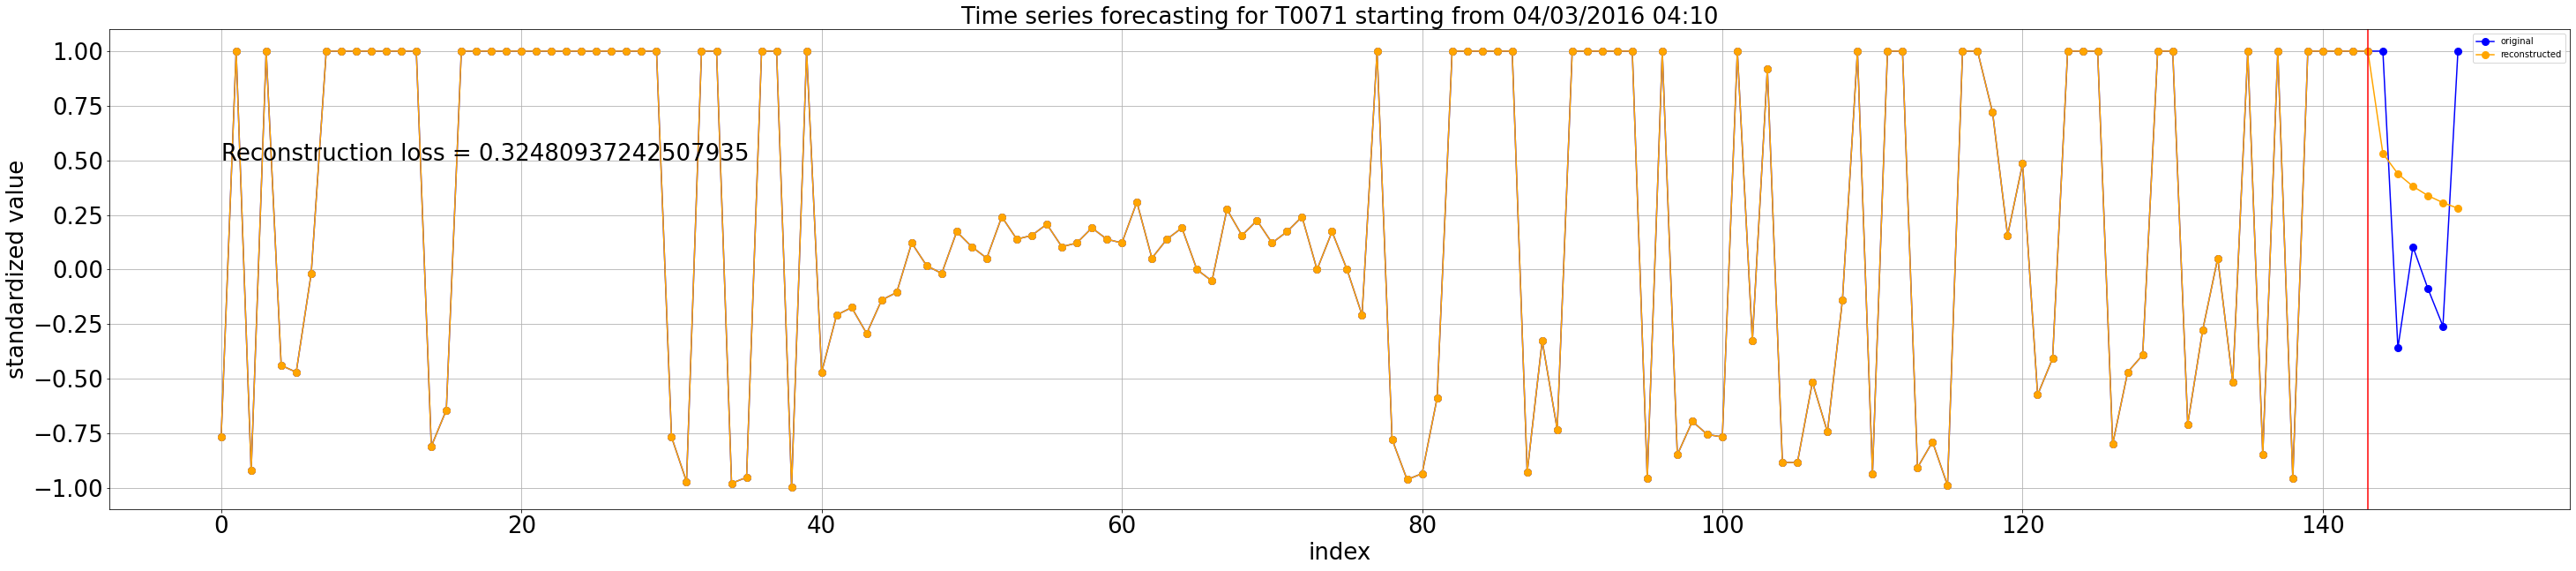

In [81]:
top_loss_indexes_list = list(top_loss_indexes.cpu().numpy())
# append validated anomalies (to be cleaned)
validated_anomalies = list(np.unique((sample_tensor_validation != 1).nonzero(as_tuple=True)[0].numpy()))
top_loss_indexes_list.extend(validated_anomalies)
for i in top_loss_indexes_list:
  f = plt.figure()
  f.set_figwidth(50)
  f.set_figheight(10)
  # single_date = str(date[i])
  plt.title(f'Time series forecasting for {sensor_code} starting from {date[i]}' ,fontsize = 26)
  plt.ylabel('standardized value',fontsize=26)
  plt.xlabel('index',fontsize=26)
  plt.xticks(fontsize=26)
  plt.yticks(fontsize=26)
  
  # find the outliers according to the validation
  y_outliers = np.where(sample_tensor_validation[i].to("cpu") == 1, np.NaN, sample_tensor_target[i].to("cpu"))
  # plt.xlim(96,102)
  original_signal = torch.cat((sample_tensor_features, sample_tensor_target), 1)[i]
  plt.plot(original_signal.to("cpu"), "o-",ms=8,color="blue", label = "original")
  plt.text(0,max(original_signal)-0.5,f'Reconstruction loss = {loss[i]}',fontsize=26)
  plt.plot(reconstructed[i].to("cpu"),"o-",ms=8,color="orange", label = "reconstructed")
  # plt.plot(np.arange(94,100), y_outliers, "x-",ms=15,mew=10,color="red")
  # plt.fill_between(line_deviation.index,under_line,over_line, color='b', alpha=.1)
  plt.axvline(x=143, color='red')
  plt.grid()
  plt.legend()
  my_file = station + '_' + quantity + '_0' +'.pdf'
  plt.savefig(os.path.join(my_path, my_file))
  i=i+1
  # plt.savefig('T0010_temperature_anomaly.pdf')


In [82]:
model.eval()
with torch.no_grad():
    reconstructed = model(sample_tensor_features,pred_length)

print(reconstructed.shape)
print(pred_length)
print(sample_tensor_features.shape)
print(len(sample))

torch.Size([22651, 150])
6
torch.Size([22651, 144])
22651


In [61]:
sample_tensor_features_arr = []
sample_tensor_target_arr = extract_quantity_from_dataset(sample,"target",None,device=device)
for k in samples_list:
  sample_tensor_features = extract_quantity_from_dataset(sample,"features", k ,device=device) 
  sample_tensor_features_arr.append(sample_tensor_features)

In [83]:
sample_tensor_features_total = torch.cat([a for a in sample_tensor_features_arr])
print(sample_tensor_features_total)
print(sample_tensor_features_total.shape)
print(sample_tensor_target_arr.shape)

tensor([[-0.9397,  1.0000, -0.6293,  ...,  1.0000,  1.0000,  0.3907],
        [ 1.0000, -0.7193, -0.1219,  ..., -0.6947, -0.4384, -0.5736],
        [-0.5299, -0.4384, -0.4695,  ..., -0.3907, -0.2924, -0.3256],
        ...,
        [-0.1219, -0.4226, -0.2419,  ...,  0.2756,  0.0175, -0.5000],
        [-0.1045,  0.0175,  0.0698,  ..., -0.8480, -0.8090, -0.8746],
        [-0.2924,  0.1736,  0.3584,  ..., -0.9063, -0.9063, -0.8290]],
       device='cuda:0')
torch.Size([22651, 144])
torch.Size([22651, 6])


In [63]:
model.eval()
reconstructed_arr = []
with torch.no_grad():
    for sample_tensor_features in sample_tensor_features_arr:
      reconstructed = model(sample_tensor_features,pred_length)
      reconstructed_arr.append(reconstructed)
print(reconstructed.shape)
print(pred_length)
print(sample_tensor_features.shape)

torch.Size([22651, 150])
6
torch.Size([22651, 144])


In [64]:
reconstructed_total = torch.cat([x for x in reconstructed_arr])
print(reconstructed_total.shape)

torch.Size([22651, 150])


In [65]:
# Find the data with highest loss
criterion = nn.MSELoss(reduction='none')
#sample_tensor_target = extract_quantity_from_dataset(sample,"target", k ,device=device) 
#print(sample_tensor_target.size())
loss = criterion(reconstructed_total[:,-pred_length:], sample_tensor_target_arr).mean(dim=1)

In [66]:
arr = loss.cpu().detach().numpy()
print(arr.shape)

(22651,)


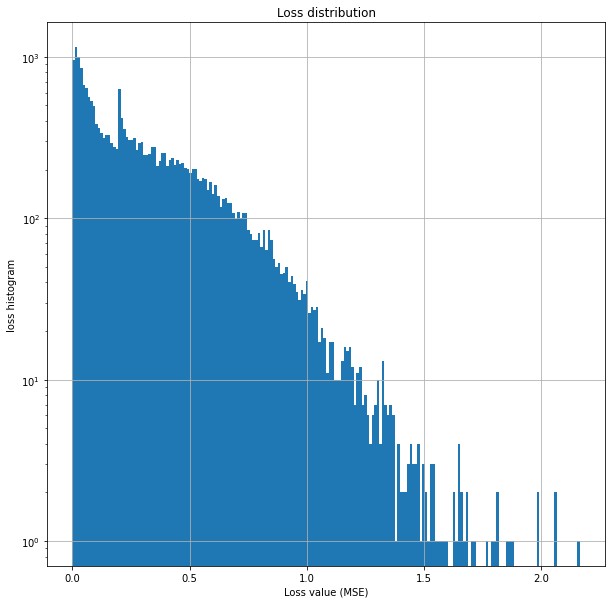

<Figure size 432x288 with 0 Axes>

In [67]:
plt.figure(figsize=[10,10])
plt.hist(arr, bins = 200)
plt.yscale('log')
plt.xlabel("Loss value (MSE)")
plt.ylabel("loss histogram")
plt.title("Loss distribution")
plt.grid()
plt.show()
my_file = station + '_' + quantity + '_hist1' + '.pdf'
plt.savefig(os.path.join(my_path, my_file))        

In [68]:
sample_tensor_validation_tot = extract_quantity_from_dataset(dataset['train'],"labels",None,device=device)
bool_validation = np.any(sample_tensor_validation_tot.cpu().numpy()!=1,axis=1)
val,counts = np.unique(bool_validation,return_counts=True)

In [69]:
indexes_anomalies = np.where(bool_validation)[0]
print(loss[bool_validation])

tensor([0.0223, 0.3295, 0.3926], device='cuda:0')


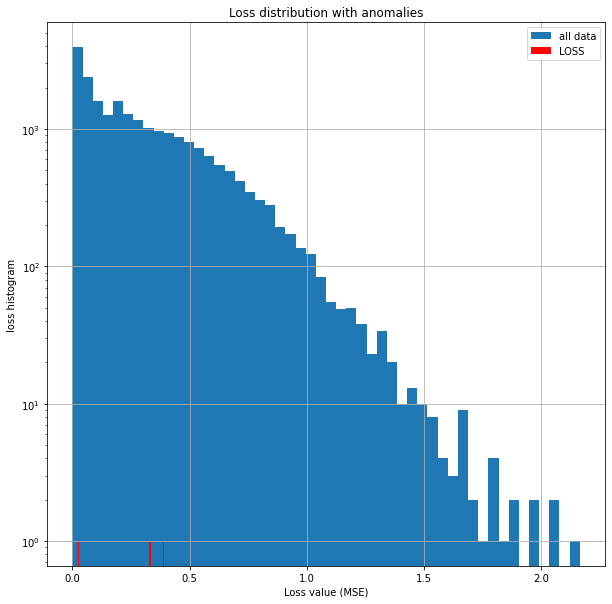

<Figure size 432x288 with 0 Axes>

In [70]:
plt.figure(figsize=[10,10])
N_BINS = 50
plt.hist(arr, bins = N_BINS, label = 'all data')
plt.hist(loss[bool_validation].cpu(), bins = N_BINS, label = 'LOSS', color = 'red')
plt.yscale('log')
plt.xlabel("Loss value (MSE)")
plt.ylabel("loss histogram")
plt.title("Loss distribution with anomalies")
plt.grid()
plt.legend()
plt.show()
my_file = station + '_' + quantity + '_hist2' + '.pdf'
plt.savefig(os.path.join(my_path, my_file))        

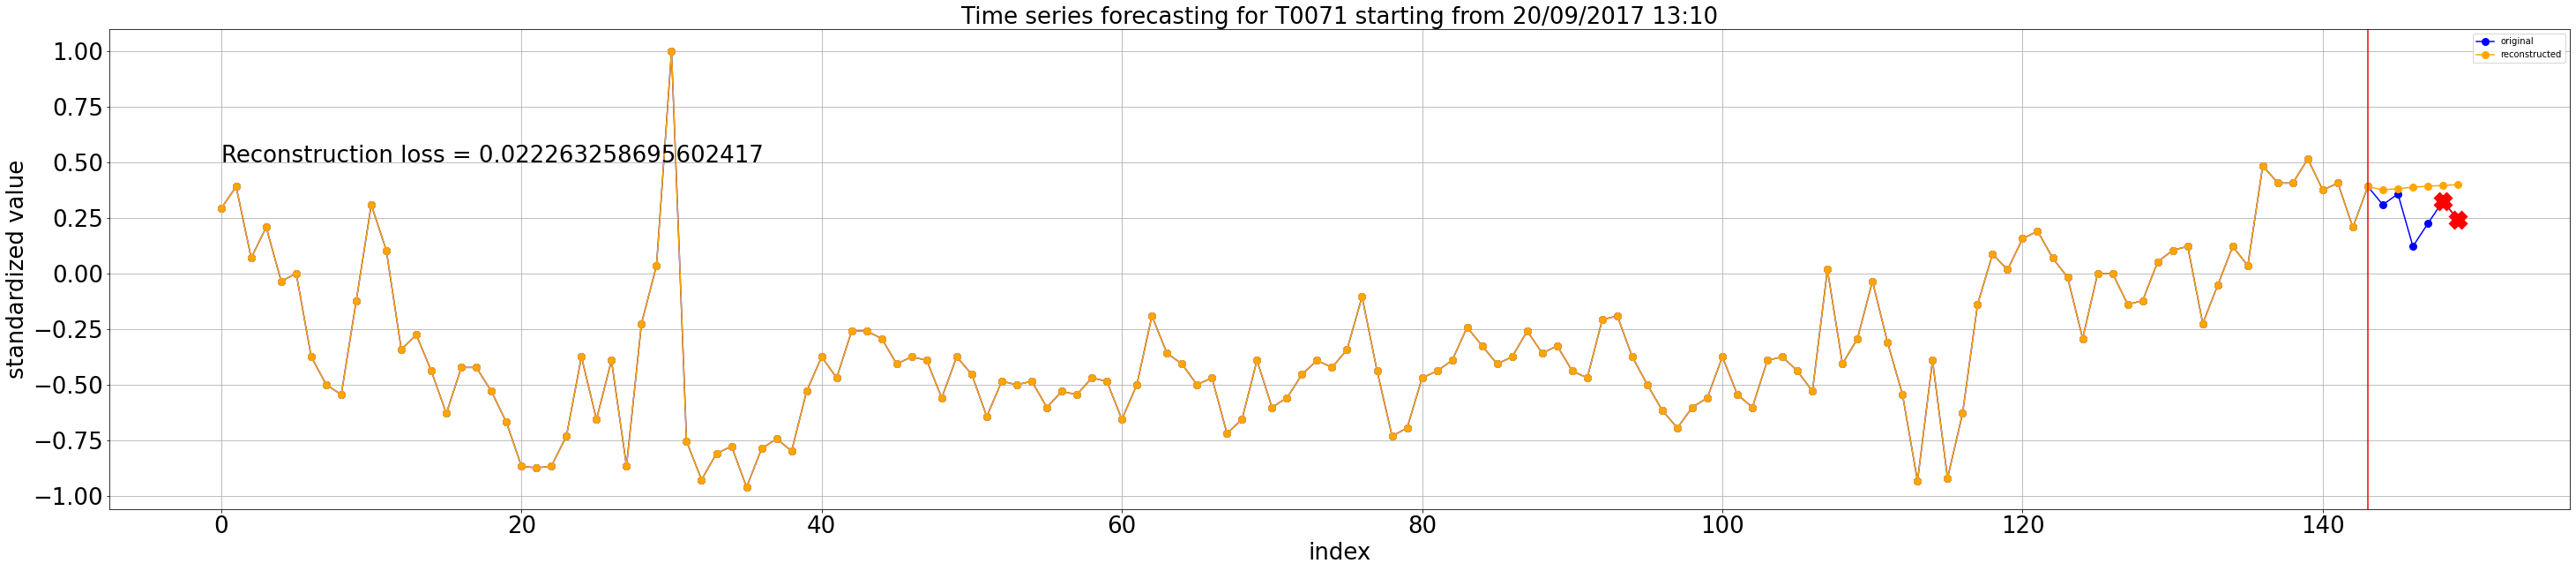

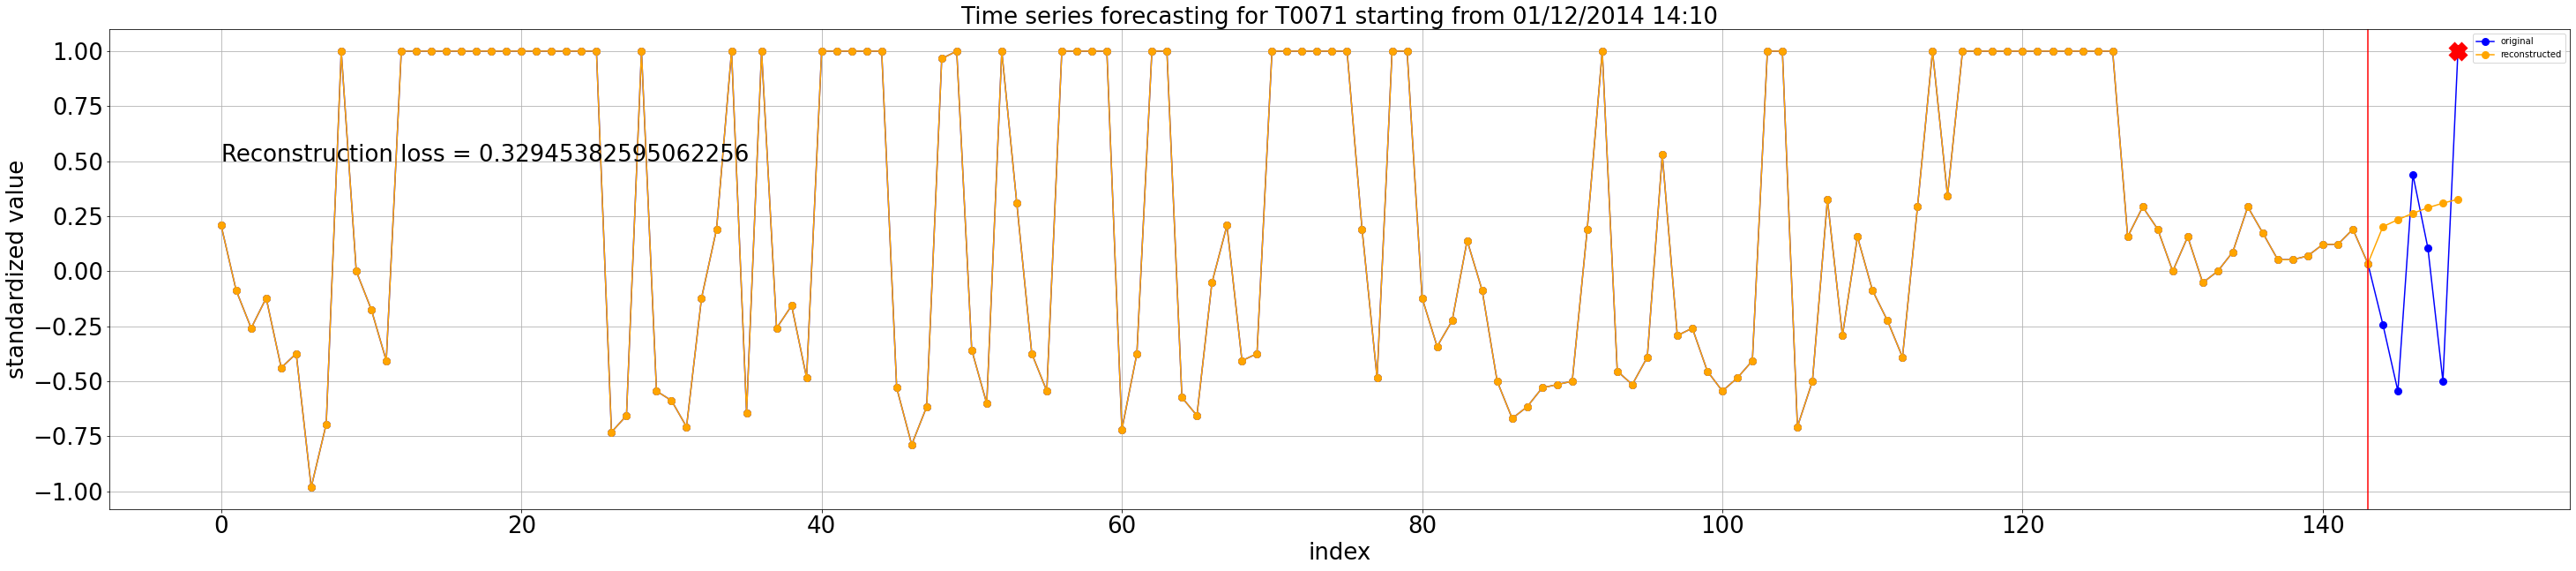

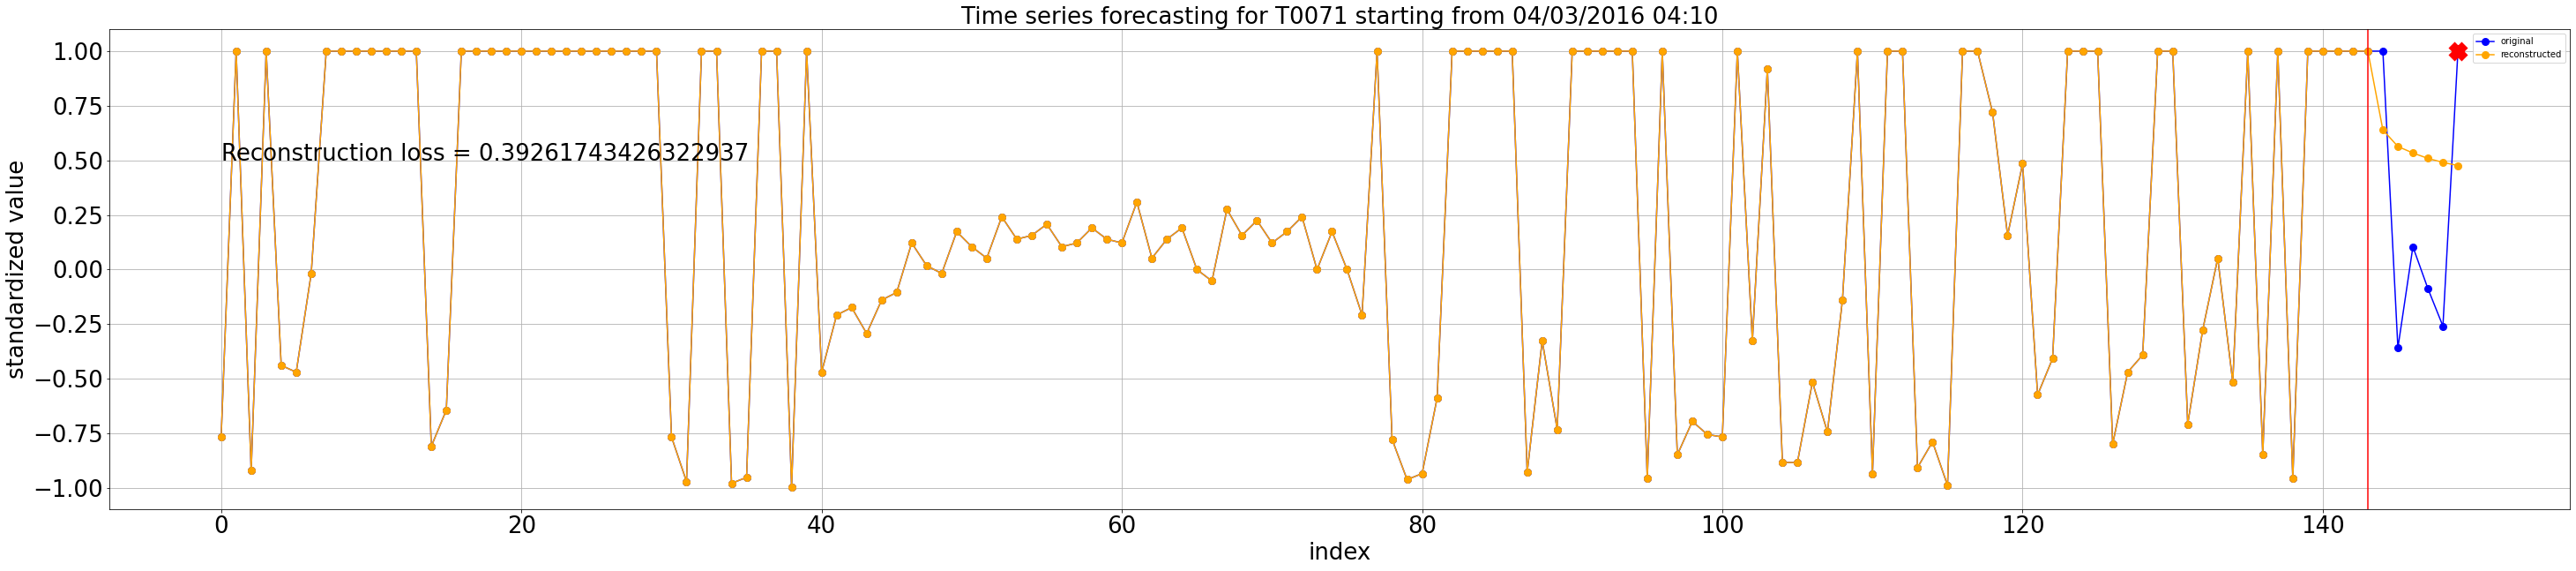

In [72]:
for i in indexes_anomalies:
  f = plt.figure()
  f.set_figwidth(50)
  f.set_figheight(10)
  # single_date = str(date[i])
  plt.title(f'Time series forecasting for {sensor_code} starting from {date[i]}' ,fontsize = 26)
  plt.ylabel('standardized value',fontsize=26)
  plt.xlabel('index',fontsize=26)
  plt.xticks(fontsize=26)
  plt.yticks(fontsize=26)
  
  # find the outliers according to the validation
  y_outliers = np.where(sample_tensor_validation[i].to("cpu") == 1, np.NaN, sample_tensor_target[i].to("cpu"))
  # plt.xlim(96,102)
  original_signal = torch.cat((sample_tensor_features, sample_tensor_target), 1)[i]
  plt.plot(original_signal.to("cpu"), "o-",ms=8,color="blue", label = "original")
  plt.text(0,max(original_signal)-0.5,f'Reconstruction loss = {loss[i]}',fontsize=26)
  plt.plot(reconstructed[i].to("cpu"),"o-",ms=8,color="orange", label = "reconstructed")
  plt.plot(np.arange(144,150), y_outliers, "x-",ms=15,mew=10,color="red")
  # plt.fill_between(line_deviation.index,under_line,over_line, color='b', alpha=.1)
  plt.axvline(x=143, color='red')
  plt.grid()
  plt.legend()
  my_file = station + '_' + quantity + '_1' + '.pdf'
plt.savefig(os.path.join(my_path, my_file))        